$$\text{Due: 15.05.2019}$$
# Group Project - Energy and mass balance at Zhadang glacier
$$\text{by Michael Binder, Josef Zink and Calvin Beck} $$
<br>
<img src="Zhandang.jpg" style="height:250px"> 
<br>
$$\textbf{Image 1: } \text{Zhandang glacier in the southern Tibetan plateau close to the beginning and end of the ablation season.}$$

## 0. Fundamentals
### 0.1 Data extraction

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

datapath = 'aws_data_zhadang_UTC+6.csv' #adapt datapath

pd.options.display.max_rows = 5 #number of displayed rows

df = pd.read_csv(datapath,index_col=0, parse_dates=True)

### 0.2 Constants and parameters

In [2]:
# Constants
eps_glac = 1          # emissivity of glacier surface
sigma = 5.67*10**(-8) # W m^-2 K^-4, Stefan-Boltzmann constant
cp    = 1005          # J kg^-1 K^-1, specific heat capacity of air
k     = 0.4           # Von Karman constant
Rv    = 465           # J kg^-1 K^-1, gas constant of water vapor
p0    = 1013.25       # hPa, mean sea level pressure
T0    = 273.15        # K, Triple point of water
rho0  = 1.29          # kg m^-3, density of air at mean sea level pressure
Lv    = 2.5*10**6     # J kg^-1, latent heat of vaporisation
Lm    = 3.34*10**5    # J kg^-1, latent heat of melt
Ls    = Lv + Lm       # J kg^-1, latent heat of sublimation 2.83*10**6 or 2.84*10**6

# Parameters (measurement setting) 
dt = 3600             # 1h
zm  = 2.5             # m, measurement height of wind
zh  = 2               # m, measurement height of temperature
zv  = 2               # m, measurement height of humidity
z0m = 0.0017          # m, surface roughness length for momentum
z0h = 0.0012          # m, surface roughness length for temperature
z0v = 0.0012          # m, surface roughness length for vapor

### 0.3 Data preprocessing
In order to use our data for calculation, it has to be preprocessed to fit our needs. Since the measured temperatures have been measured in Celsius, they have to be converted into Kelvin.

In [3]:
df['TEMP']     = df['TEMP'] + 273.15 # air temperature Ta in K
df['SURFTEMP'] = df['SURFTEMP'] + 273.15 # surface temperature Ts in K

When looking at the surface temperature data, values greater than 0°C can be observed. However, in reality, this can not be the case, which is why all values above this limit are set to $273.15\,\mathrm{K}$.

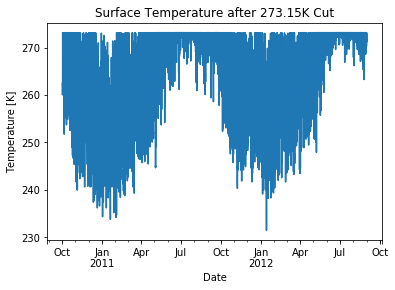

In [4]:
df['SURFTEMP'][df['SURFTEMP']>273.15]=273.15
df['SURFTEMP'].plot()
plt.title('Surface Temperature after 273.15K Cut')
plt.xlabel('Date')
plt.ylabel('Temperature [K]');

Furthermore, the longwave out sensor has measured the signal as a temperature. To calculate the energy flux, the Stefan–Boltzmann law is used for conversion with the emissivity $\epsilon$ and the Stefan-Bolzmann constant $\sigma$. 
$$J_{In} =\epsilon \sigma T^4
$$

In [5]:
df['LWOUT'] = eps_glac * sigma * df['SURFTEMP']**4 # W m^-2

## 1.Radiative fluxes

### 1.1. Sensor specifications:

#### NR-Lite (Campbell) all-wave
Spectral range: 200 to 100000 nm <br>
Accuracy: <br>
Directional error (0-60° at 1000 W / m²): < 30 W / m² <br>
Sensor asymmetry: ±5% (+- 10% worst case) <br>

#### CS300 (Campbell) short wave
Spectral response: 360 to 1120 nm <br>
Accuracy:  ±5% <br>

#### IRTS-P (Apogee) infrared
Spectral response: 6000 to 14000 nm <br>
Accuracy: <br>
± 0.2°C from 15°C to 35°C <br>
± 0.3° from 5° to 45°C <br>
± 0.1° when sensor body and target are at the same temp. <br>

### 1.2. Calculate incoming long wave radiation
The longwave incoming radiation can be calculated using the following formula: <br>
<br>
\begin{equation}
LW_{In} = Q_{Net} - SW_{In} + SW_{Out} + LW_{Out}
\end{equation}

However, when researching the instrument specifications, it can be noticed, that both the short- and longwave sensors combined do not cover the wavelength spectrum of the all-wave sensor. This energy gap between $1120\,\text{nm}$ and $6000\,\text{nm}$ results in the incoming longwave radiation being overestimated.

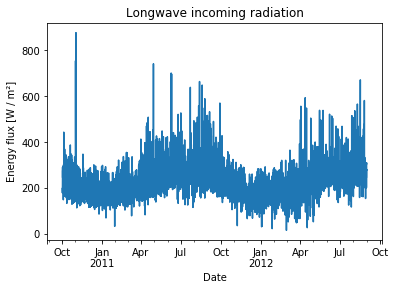

In [6]:
df['LWIN']  = df['NETRAD'] - df['SWIN'] + df['SWOUT'] + df['LWOUT']
df['LWIN'].plot()
plt.title('Longwave incoming radiation')
plt.xlabel('Date')
plt.ylabel('Energy flux [W / m²]');

## 1.3. Radiation fluxes (monthly means)

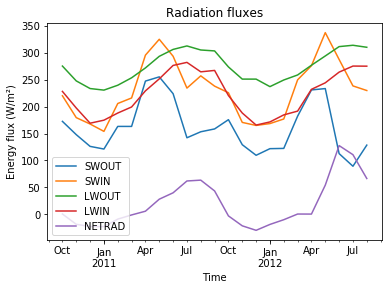

In [7]:
df_mean = df.resample('MS').mean()
ax = df_mean.plot(y = ['SWOUT', 'SWIN', 'LWOUT', 'LWIN', 'NETRAD'])
ax.set(xlabel="Time", ylabel="Energy flux (W/m²)", title = 'Radiation fluxes');

During the summer month, the net radiation heat flux is positive, during the winter month the flux is negative.

### 1.4 Driving forces of radiational fluxes:
In the two following plots, the daily cycle of each of the observed radiational fluxes is displayed, comparing between summer and wintertime.

#### $SW_{In}:$ 
Incoming shortwave radiation, in comparison to the other radiational fluxes, reaches the highest energy flux values, however only for a certain amount of time. This is because solar radiation is the main driver for incoming shortwave radiation. This results in SW radiation underlying seasonal fluctuations in the maximum value of the energy flux and the width in the distribution, following the path of the sun. Obstacles such as clouds and mountains that block the sunlight also lead to a reduction of $SW_{In}$ radiation and deform bell curve.

#### $SW_{OUT}:$
The daily cycle of outcoming shortwave radiation almost has the same shape like the one from incoming shortwave radiation. This is because the incoming shortwave radiation is reflected at the glacier surface, which is dependent on the albedo of the surface. Since the albedo in the summer is smaller, less radiation is reflected.

#### $LW_{OUT}:$
Longwave outgoing energy flux is due to blackbody radiation of the snow/ice surface and surrounding objects. It follows the Stefan-Boltzmann law $LW_{OUT} = \sigma \epsilon T^4$ with the surface temperature as a dominant factor due to its high power. Compared to short wave radiation it does not underly so strong daily cycles but increases with daily warming. However, in summertime, the daily fluctuations are much weaker since the surface temperature is close to melting temperature most of the time.

#### $LW_{In}:$
Analog to outgoing longwave radiation the observed incoming longwave radiation can be described as the energy flux radiated from a black body. Here primarily the clouds and other infrared active gases re-emit previously absorbed radiation back to earth. Furthermore, radiation can originate from areas of the glacier and rocks above the measurement location. Because of Stefan-Boltzmann law, temperature is the main driving force.  

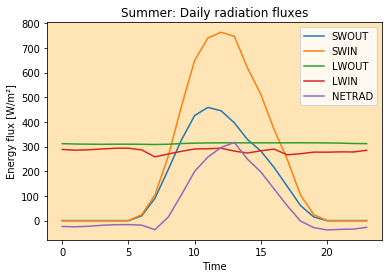

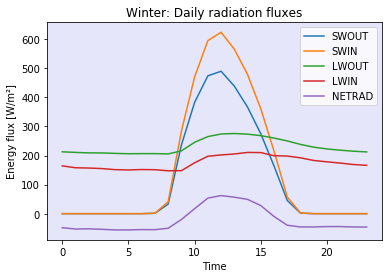

In [8]:
df_w = df.loc['2011-01-01':'2011-01-31'] # use January for the winter month
df_w = df_w.groupby(df_w.index.hour).mean() 
df_s = df.loc['2011-07-01':'2011-07-31'] # use July for the summer month
df_s = df_s.groupby(df_s.index.hour).mean()


ax0 = df_s.plot(y = ['SWOUT', 'SWIN', 'LWOUT', 'LWIN', 'NETRAD'])
ax0.set(facecolor="moccasin", xlabel="Time", ylabel="Energy flux [W/m²]", title = 'Summer: Daily radiation fluxes')
ax1 = df_w.plot(y = ['SWOUT', 'SWIN', 'LWOUT', 'LWIN', 'NETRAD'])
ax1.set(facecolor="lavender", xlabel="Time", ylabel="Energy flux [W/m²]", title = 'Winter: Daily radiation fluxes');

## 2. Turbulent Fluxes

### 2.1. Sensible heat flux

The sensible heat flux is estimated using the following formular, based on Monin-Obukhov similarity theory:
$$\quad$$
\begin{equation}
Q_H = c_p \rho_0 \frac{p}{p_0}\frac{k^2 v (T_a - T_s)}{ln(\frac{z_m}{z_{0m}})ln(\frac{z_h}{z_{Oh}})}
\end{equation}
where:

$\qquad c_p$ = specific heat capacity of air

$\qquad \rho_0$  = density of air at mean sea level  pressure

$\qquad \frac{p}{p_0}$ = ratio of air pressure at measurement location and mean sea level air pressure

$\qquad T_a - T_s$ = difference of measured air temperature and temperature of surface

$\qquad \frac{z_m}{z_{0m}}$ = ratio of measurement height of wind measurement and surface roughness length for momentum

$\qquad \frac{z_h}{z_{0h}}$ = ratio of measurement height of temperature measurement and surface roughness length for temperature

$\qquad k$ = von Karman constant

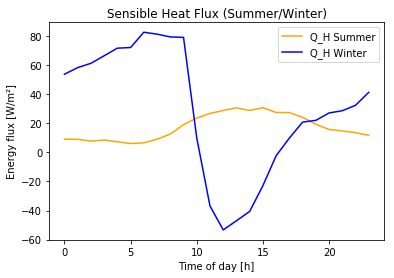

In [9]:
def sensibleHeatFlux(df,zm,zh,zv,z0m,z0h,z0v):
    return cp * rho0 * df['PRESSURE']/p0 * k**2 * df['WINDSPEED'] * (df['TEMP']-df['SURFTEMP']) / (np.log(zm/z0m)*np.log(zh/z0h))

# Calculate Q_H
df['Q_H'] = sensibleHeatFlux(df,zm,zh,zv,z0m,z0h,z0v)

# Calculate and plot the daily cycle for the months of JAN and JUL
df_w = df.loc['2011-01-01':'2011-01-31']
df_w = df_w.groupby(df_w.index.hour).mean()
df_s = df.loc['2011-07-01':'2011-07-31']
df_s = df_s.groupby(df_s.index.hour).mean()

# Plot Q_H for summer and winter
plt.plot(df_s.index, df_s['Q_H'], label="Q_H Summer", c='orange')
plt.plot(df_w.index, df_w['Q_H'], label="Q_H Winter", c='blue')
plt.title("Sensible Heat Flux (Summer/Winter)")
plt.ylabel(r'Energy flux [W/m²]')
plt.xlabel(r'Time of day [h]')
plt.legend();

As it can be observed in the plot above, the variability of the sensible heat flux over the daily cycle is larger in wintertime. This is due to the temperature difference between the surrounding air and the surface, which is displayed in the following two plots. $$ \quad $$
The summer example shows that the surrounding air is always warmer than the surface temperature, with a maximum difference towards noon. This results in always positive sensible heat fluxes for the month of July. In the summertime, the daily variability of air temperature is much larger as in the corresponding winter example. In that case, however, the surface temperature variability exceeds the summer example. As a result of this, the surface temperature exceeds the air temperature at noon, leading to a negative sensible heat flux value. At the late afternoon, the temperature of the surface drops below the air temperature again resulting in a positive sensible heat flux.

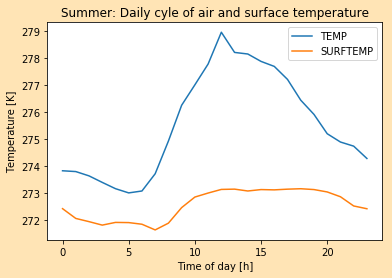

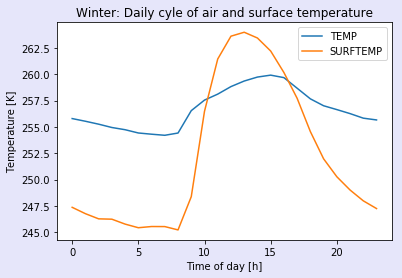

In [10]:
fig = plt.figure()
fig.set_facecolor("moccasin")
plt.plot(df_s.index, df_s['TEMP'], label="TEMP")
plt.plot(df_s.index, df_s['SURFTEMP'], label="SURFTEMP")
plt.legend()
plt.xlabel('Time of day [h]')
plt.ylabel('Temperature [K]')
plt.title('Summer: Daily cyle of air and surface temperature')
plt.show()
fig = plt.figure()
fig.set_facecolor("lavender")
plt.plot(df_s.index, df_w['TEMP'])
plt.plot(df_s.index, df_w['SURFTEMP'])
plt.xlabel('Time of day [h]')
plt.ylabel('Temperature [K]')
plt.title('Winter: Daily cyle of air and surface temperature')
plt.legend()
plt.show();

### 2.2. Latent heat flux
Similar to the sensible heat flux, the latent heat flux can be calculated as follows:
\begin{equation}
Q_L = 0.623 \cdot L_s \cdot \frac{\rho_0}{p_0} \frac{k^2 v (e_a - e_s)}{ln(\frac{z_m}{z_{0m}})ln(\frac{z_v}{z_{Ov}})}
\end{equation}

where:

$\qquad (e_a - e_s)$ = difference between water vapor pressure of air and saturation vapor pressure at the surface

$\qquad v$ = windspeed

$\qquad L_s$ = latent heat for sublimation

$\qquad \frac{z_h}{z_{0h}}$ = ratio of measurement height of vapor measurement and surface roughness length for vapor

In order to calculate the water vapor pressure of air, first the saturation water vapor pressure of air $e_{sa}$ has to be calculated with following formula:
$$ e_{sa} = 6.11 e^{\frac{L}{R_v} \left (\frac{1}{T_0} - \frac{1}{T_a} \right )}$$
Where $L = L_v$ if $T_a >= T_0$ and $L_s$ elsewhere.

The vapor pressure of air can then be computed out of $e_{sa}$ and the relative humidity $RH$:
$$ e_a = \frac{RH}{100}e_{sa}$$

Analog, the saturation vapor pressure of the surface can be calculated as followed:
$$ e_{s} = 6.11 e^{\frac{L}{R_v} \left (\frac{1}{T_0} - \frac{1}{T_s} \right )}$$
Where $L = L_v$ if $T_s >= T_0$ and $L_s$ elsewhere.


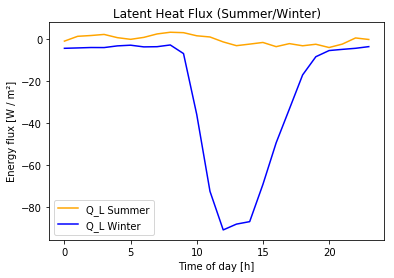

In [11]:
def latentHeatFlux(df,zm,zh,zv,z0m,z0h,z0v):
    L_esa = np.where(df['TEMP'] >= T0, Lv, Ls) # L_esa = Lv if Ta ≥ T0 and Ls elsewhere
    esa = 6.11*np.exp(L_esa/Rv*(1/T0-1/df['TEMP'])) # saturation vapor pressure of air
    ea = df['RH']*esa/100 # actual vapor pressure

    L_es = np.where(df['SURFTEMP'] >= T0, Lv, Ls) # L_es = Lv if Ts ≥ T0 and Ls elsewhere
    es = 6.11*np.exp(L_es/Rv*(1/T0-1/df['SURFTEMP'])) # saturation vapor pressure of surface
  
    return 0.623 * Ls * rho0 / p0 * k**2 * df['WINDSPEED'] * (ea - es) / (np.log(zm/z0m) * np.log(zv/z0v))

# Calculate Q_L
df['Q_L'] = latentHeatFlux(df,zm,zh,zv,z0m,z0h,z0v)

# Calculate and plot the daily cycle for the months of JAN and JUL
df_w = df.loc['2011-01-01':'2011-01-31']
df_w = df_w.groupby(df_w.index.hour).mean()
df_s = df.loc['2011-07-01':'2011-07-31']
df_s = df_s.groupby(df_s.index.hour).mean()

plt.plot(df_s.index, df_s['Q_L'], label="Q_L Summer", c='orange')
plt.plot(df_w.index, df_w['Q_L'], label="Q_L Winter", c='blue')
plt.title("Latent Heat Flux (Summer/Winter)")
plt.ylabel('Energy flux [W / m²]')
plt.xlabel('Time of day [h]')
plt.legend();

The daily cycle of the latent heat flux differs strongly between winter and summer season. This is shown in the previous plot, where averaged LHF values from the months January and July are displayed. The summer data show an almost constant value over the daily cycle, whereas the winter data decrease strongly towards noon. This happens when the saturation vapor pressure at the surface exceeds the water vapor pressure of air.

### 2.3. Comparison to other fluxes

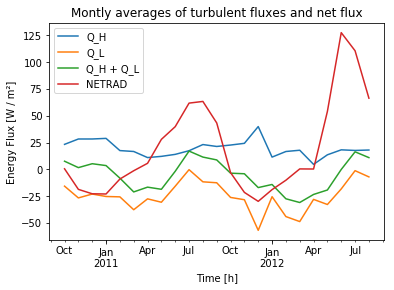

In [12]:
# Monthly averages
df_monthlyMean = df.resample('MS').mean()
df_monthlyMean['Q_H + Q_L'] = df_monthlyMean['Q_H'] + df_monthlyMean['Q_L']
df_monthlyMean.plot(y = ['Q_H','Q_L', 'Q_H + Q_L','NETRAD'])
plt.title('Montly averages of turbulent fluxes and net flux')
plt.xlabel('Time [h]')
plt.ylabel('Energy Flux [W / m²]')
plt.legend();

In the previous plot, the latent and sensible heat flux are compared to the amount of net short and longwave radiation. In winter the sensible heat flux exceeds the radiation fluxes. However, in summer these are less important but are still in the same order of magnitude. The latent heat fluxes on the other side fall below the values for the net radiation all year round.

### 2.4. Sensitivity to the meteorological conditions:

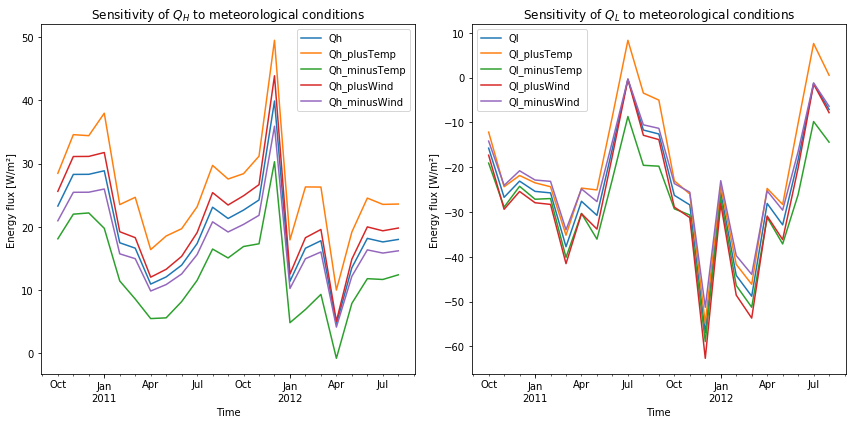

In [13]:
# Generate 4 data frames (+-1K Temp and +- 10% windspeed)
df_plusTemp  = df.copy() 
df_minusTemp = df.copy()
df_minusWind = df.copy()
df_plusWind  = df.copy()

df_plusTemp['TEMP'] = df_plusTemp['TEMP'] + 1
df_minusTemp['TEMP'] = df_minusTemp['TEMP'] - 1
df_plusWind['WINDSPEED'] = df_plusWind['WINDSPEED'] * 1.1
df_minusWind['WINDSPEED'] = df_minusWind['WINDSPEED'] * 0.9

# Generate data frame for results and calculate respective fluxes
df_results = df.drop(df.columns[0:len(df.columns)],axis=1)
df_results['Qh'] = df.Q_H
df_results['Ql'] = df.Q_L
df_results['Qh_plusTemp'] = sensibleHeatFlux(df_plusTemp,zm,zh,zv,z0m,z0h,z0v)
df_results['Ql_plusTemp'] = latentHeatFlux(df_plusTemp,zm,zh,zv,z0m,z0h,z0v)
df_results['Qh_minusTemp'] = sensibleHeatFlux(df_minusTemp,zm,zh,zv,z0m,z0h,z0v) 
df_results['Ql_minusTemp'] = latentHeatFlux(df_minusTemp,zm,zh,zv,z0m,z0h,z0v)
df_results['Qh_plusWind'] = sensibleHeatFlux(df_plusWind,zm,zh,zv,z0m,z0h,z0v)
df_results['Ql_plusWind'] = latentHeatFlux(df_plusWind,zm,zh,zv,z0m,z0h,z0v)
df_results['Qh_minusWind'] = sensibleHeatFlux(df_minusWind,zm,zh,zv,z0m,z0h,z0v) 
df_results['Ql_minusWind'] = latentHeatFlux(df_minusWind,zm,zh,zv,z0m,z0h,z0v)

# Calculate the monthly means for plotting
df_results_mean = df_results.resample('M').mean()

# Plots
fig, axs = plt.subplots(1,2, figsize = (12,6))
df_results_mean.plot(y = ['Qh','Qh_plusTemp', 'Qh_minusTemp', 'Qh_plusWind', 'Qh_minusWind'], ax=axs[0])
df_results_mean.plot(y = ['Ql','Ql_plusTemp', 'Ql_minusTemp', 'Ql_plusWind', 'Ql_minusWind'], ax=axs[1])
axs[0].set(xlabel="Time", ylabel="Energy flux [W/m²]", title = r'Sensitivity of $Q_H$ to meteorological conditions')
axs[1].set(xlabel="Time", ylabel="Energy flux [W/m²]", title = r'Sensitivity of $Q_L$ to meteorological conditions')
fig.tight_layout();

In comparison to the sensitive heat flux, the latent heat flux is less sensitive to meteorological changes in temperature and wind speed. In contrast to windspeed, which is directly proportional to latent heat flux, the temperature influences the outcome indirectly by influencing the vapor pressure of air. This sensitivity experiment is a restricted estimator, which makes it possible to isolate effects. But in reality, one change in meteorological conditions has an influence on other parameters (such as surface temperature) which in this case were not considered.

### 2.5. Sensitivity to the measurement heights:

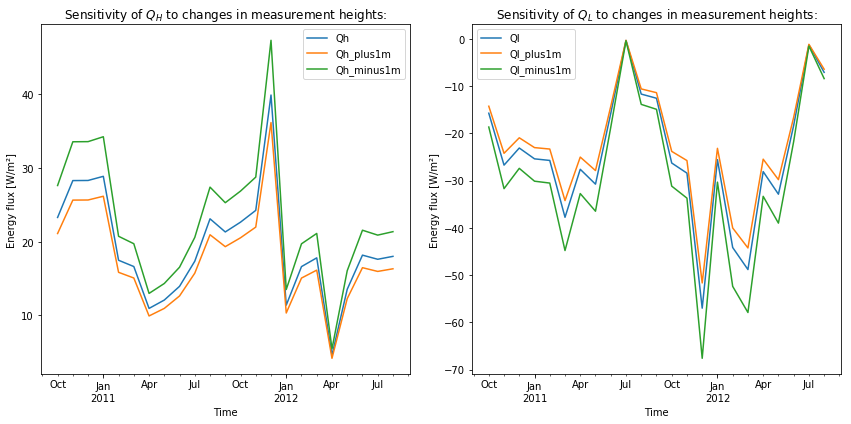

In [14]:
# Calculate fluxes for varying measurement heights
df_results = df_results.drop(df_results.columns[2:len(df_results.columns)],axis=1)
df_results['Qh_plus1m'] = sensibleHeatFlux(df,zm+1,zh+1,zv+1,z0m,z0h,z0v)
df_results['Qh_minus1m'] = sensibleHeatFlux(df,zm-1,zh-1,zv-1,z0m,z0h,z0v)
df_results['Ql_plus1m'] = latentHeatFlux(df,zm+1,zh+1,zv+1,z0m,z0h,z0v)
df_results['Ql_minus1m'] = latentHeatFlux(df,zm-1,zh-1,zv-1,z0m,z0h,z0v)

# Calculate the monthly means for plotting
df_results_mean = df_results.resample('M').mean()

# Plots
fig, axs = plt.subplots(1,2, figsize = (12,6))
df_results_mean.plot(y = ['Qh','Qh_plus1m', 'Qh_minus1m'], ax=axs[0])
df_results_mean.plot(y = ['Ql','Ql_plus1m', 'Ql_minus1m'], ax=axs[1])
axs[0].set(xlabel="Time", ylabel=r'Energy flux [W/m²]', title = r'Sensitivity of $Q_H$ to changes in measurement heights:')
axs[1].set(xlabel="Time", ylabel=r'Energy flux [W/m²]', title = r'Sensitivity of $Q_L$ to changes in measurement heights:')
fig.tight_layout();


To evaluate the effects of a changing snow cover to the heat fluxes, a change of $\pm 1\,$m in measurement height is displayed in the diagrams above. Although latent and sensitive fluxes are not influenced equally, it can be seen that negative height changes have a proportinately larger effect. In contrast to sensitive heat flux, which shows a similar displacement all year round, the latent heat fluxes are mostly influenced in winter. In summer months, such as in July, the latent heat flux is not at all sensitive to changes in measurement height.

### 2.6. Sensitivity to the roughness parameters:

Because roughness lengths are hard to estimate, most analysis use constant standard values. However, these are dependent on several factors, for instance, it has to be distinguished if an ice or a snow surface is observed. 
The roughness lengths of an ice surface range from 0.7 to 4.5 mm, whereas the roughness lengths from a snow surface vary between 0.5 and 2.4 mm. At first sight this does not seem to be a dramatic difference, nevertheless, a distinct difference in seasonal variability is observable.
At a given measurement location for an ice surface, the difference between seasonal mean values is only 0-1 mm, whereas the difference for a snow surface can reach an order of a magnitude [Fitzpatrick (2019)].
A further factor that has to be taken into account is that changes in wind direction affect the value of the momentum roughness length. This is because the features of a melting glacier surface are anisotropic. 

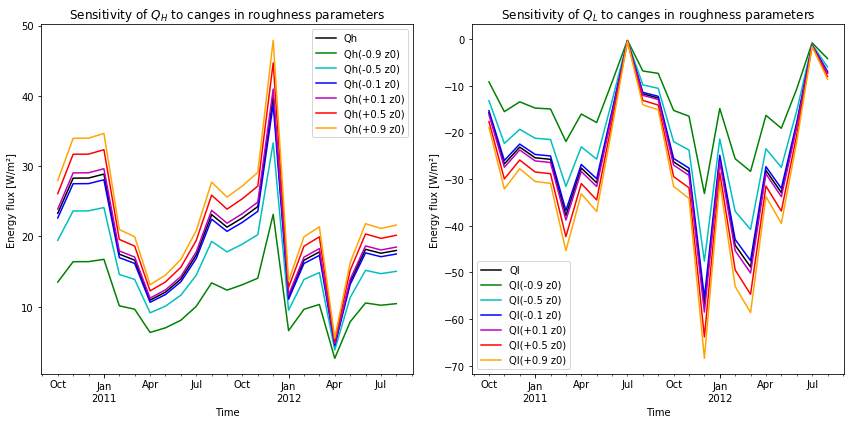

In [15]:
shift = np.array([-0.9, -0.5, -0.1, 0.1, 0.5, 0.9])
z0m_shift = z0m + shift*z0m
z0h_shift = z0h + shift*z0h
z0v_shift = z0v + shift*z0v

solution_Qh = np.zeros((23, 6))
solution_Ql = np.zeros((23, 6))

fig, ax = plt.subplots(1,2, figsize = (12,6))
df_results_mean.plot(y = ['Qh'], ax=ax[0], c='black')
df_results_mean.plot(y = ['Ql'], ax=ax[1], c='black')

Qh_label = ['Qh(-0.9 z0)','Qh(-0.5 z0)','Qh(-0.1 z0)','Qh(+0.1 z0)','Qh(+0.5 z0)','Qh(+0.9 z0)']
Ql_label = ['Ql(-0.9 z0)','Ql(-0.5 z0)','Ql(-0.1 z0)','Ql(+0.1 z0)','Ql(+0.5 z0)','Ql(+0.9 z0)']
color = ['g', 'c', 'b', 'm', 'r', 'orange']

for i in range(len(shift)):
    # Calculate fluxes for varying rougness lengths
    Qh_shift = sensibleHeatFlux(df,zm,zh,zv,z0m_shift[i],z0h_shift[i],z0v_shift[i])
    Ql_shift = latentHeatFlux(df,zm,zh,zv,z0m_shift[i],z0h_shift[i],z0v_shift[i])
    Qh_month = Qh_shift.resample('M').mean()
    solution_Qh[:,i] = Qh_month
    Ql_month = Ql_shift.resample('M').mean()
    solution_Ql[:,i] = Ql_month
    Qh_month.plot(ax=ax[0], label=Qh_label[i], c=color[i])
    Ql_month.plot(ax=ax[1], label=Ql_label[i], c=color[i])

# Plots
ax[0].set(xlabel="Time", ylabel=r'Energy flux [W/m²]', title = 'Sensitivity of $Q_H$ to canges in roughness parameters')
ax[1].set(xlabel="Time", ylabel=r'Energy flux [W/m²]', title = 'Sensitivity of $Q_L$ to canges in roughness parameters')
ax[0].legend()
ax[1].legend()
fig.tight_layout();

In the previous two plots, the latent and sensible heat flux have been calculated based on variations to the roughness parameters with a reduction/increase of $\pm 10\,\%, 50\,\%$ and $90\,\%$. As expected the outcome is similar to the sensitivity evaluation for the measurement heights. 

## 3. Residual flux $F$ and melt energy $Q_M$
$$ \quad $$
We assumed that the ground heat flux $Q_G$ and the rain heat flux $Q_R$ are small enough to be neglected. 
### 3.1 Residual flux $F$
#### (i) Monthly averages

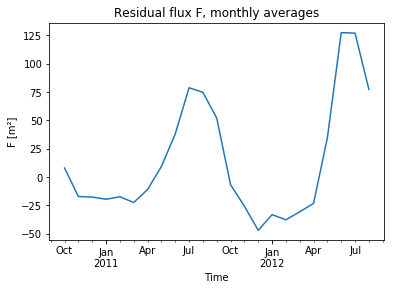

In [16]:
df['Q_G'] = 0 # ground heat flux assumed to be neglectable
df['Q_R'] = 0 # rain heat flux assumed to be neglectable

df['F'] = df['NETRAD'] + df['Q_H'] + df['Q_L'] + df['Q_R'] + df['Q_G'] # calculation of F
df['F'].resample('MS').mean().plot() # plot as monthly averages
plt.title("Residual flux F, monthly averages")
plt.ylabel('F [m²]')
plt.xlabel('Time');

During the winter months, the residual flux is negative (energy loss) and during the summer months it is positive (energy gain for the surface).

#### (ii)/(iii) Daily cycles in January and July

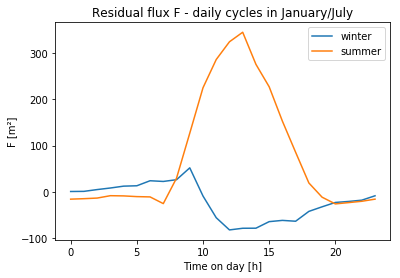

In [17]:
# new calculation of df_w and df_s, because df has now new variable F
df_w = df.loc['2011-01-01':'2011-01-31']
df_w = df_w.groupby(df_w.index.hour).mean()
df_s = df.loc['2011-07-01':'2011-07-31']
df_s = df_s.groupby(df_s.index.hour).mean()
df_w['F'].plot(label = 'winter')
df_s['F'].plot(label = 'summer')
plt.title("Residual flux F - daily cycles in January/July")
plt.ylabel('F [m²]')
plt.xlabel('Time on day [h]')
plt.legend();

In summer there is a stronger daily cycle, with maximum positive values (energy gain) at noon. This stronger daily cycle is due to the fact that incoming shortwave radiation from the sun is higher in summer.
In winter $F$ is negative at noon, so other loss fluxes exceed the shortwave incoming flux.

### 3.2. Interpretation of $F$

If we weren't over a glacier surface, the surface would be warmed if $F$ is positive and cooled if $F$ is negative. That's also true for the glacier surface, but there the surface can't be warmed above the freezing point. So if the surface temperature is below the freezing point and $F$ is positive the surface is warmed until zero degree is reached. As the freezing point is reached, the positive energy is available for melting the ice.

### 3.3. Energy available for melt $Q_M$:

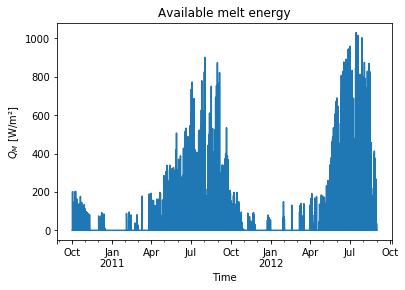

In [18]:
df['QM'] = df['F'].copy()
df['QM'] = np.where(df['F'] > 0, df['F'], 0) # F needs to be positive
df['QM'] = np.where(df['SURFTEMP'] == 273.15,df['QM'],0) # Surface temperature needs to be at 0°C
df['QM'].plot()
plt.title("Available melt energy")
plt.ylabel(r'$Q_M$ [W/m²]')
plt.xlabel('Time');

As expected, the available melt energy has its highest values in summer.

### 3.4. Importance of different energy fluxes

In [19]:
# new dataframe, with values where Q_M is strictly positiv
df_nonzero = df[df['QM']>0] 

mean = df_nonzero.mean() # calculate the mean fluxes for the new dataframe
print(' SWin = {:.2f}'.format(mean.SWIN), '\n','SWout = {:.2f}'.format(mean.SWOUT), '\n', 
      'LWout = {:.2f}'.format(mean.LWOUT),'\n','LWin = {:.2f}'.format(mean.LWIN),'\n',
       'Q_L = {:.2f}'.format(-mean.Q_L),'\n','Q_H = {:.2f}'.format(mean.Q_H))


 SWin = 677.64 
 SWout = 404.07 
 LWout = 315.64 
 LWin = 288.73 
 Q_L = 30.26 
 Q_H = 17.99


The most important energy flux for melting is the $\textbf{incoming shortwave radiation}$, followed by outgoing shortwave, outgoing longwave and incoming longwave radiation. 
Less important are latent and sensible heat flux.

## 4. Mass balance 

### 4.1. Mass flux due to melt

The melted snow/ice per squared meter over the whole periode: 6293.036232 kg/m²


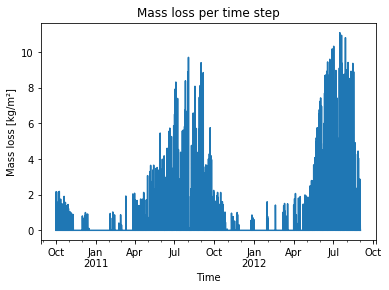

In [20]:
# Mass flux per time step dt (time between measurements)
df['MELT'] = df['QM'] / Lm * dt # kg m^-2 

df['MELT'].plot()
plt.xlabel('Time')
plt.ylabel('Mass loss [kg/m²]')
plt.title('Mass loss per time step')

# Calculate the cumulative sum of melt
df['MELT_CUM'] = np.cumsum(df['MELT'])
# Take last values to get the total melt
M_MELT = df['MELT_CUM'].iloc[-1]
print('The melted snow/ice per squared meter over the whole periode: %f kg/m²' % M_MELT)

### 4.2. Mass flux due to deposition/sublimation

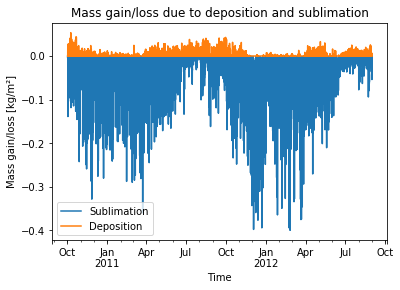

In [21]:
# Mass flux with respect to the latent heat flux per time step dt
df['LH_MassFlux'] = df['Q_L'] / Ls * dt # kg m^-2

# Define Sublimation and Deposition based on sign of latent heat flux
df['SUBLIMATION'] = np.where(df['LH_MassFlux'] < 0,df['LH_MassFlux'],0)
df['DEPOSITION'] = np.where(df['LH_MassFlux'] > 0,df['LH_MassFlux'],0)

df['SUBLIMATION'].plot(label = 'Sublimation')
df['DEPOSITION'].plot(label = 'Deposition')
plt.xlabel('Time')
plt.ylabel('Mass gain/loss [kg/m²]')
plt.title('Mass gain/loss due to deposition and sublimation')
plt.legend();

The sublimated ice per squared meter over the whole period: -560.781583 kg/m²

The deposited ice per squared meter over the whole period: 31.317041 kg/m²


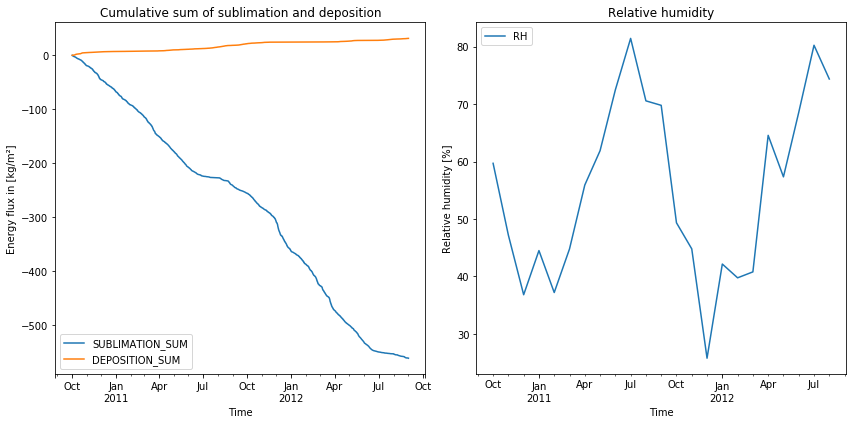

In [22]:
# Calculate the cumulative sum of sublimation and deposition
df['SUBLIMATION_SUM'] = np.cumsum(df['SUBLIMATION'])
df['DEPOSITION_SUM'] = np.cumsum(df['DEPOSITION'])

# Take last values to get the total sublimation / deposition
M_SUBLIMATION = df['SUBLIMATION_SUM'].iloc[-1]
M_DEPOSITION = df['DEPOSITION_SUM'].iloc[-1]
print('The sublimated ice per squared meter over the whole period: %f kg/m²' % M_SUBLIMATION)
print()
print('The deposited ice per squared meter over the whole period: %f kg/m²' % M_DEPOSITION)

# Plots (relative humidity is added to validate sign convention)
fig, axs = plt.subplots(1,2, figsize = (12,6))
df.plot(y = ['SUBLIMATION_SUM', 'DEPOSITION_SUM'], ax=axs[0])
df.resample('M').mean().plot(y = ['RH'], ax=axs[1])
axs[0].set(xlabel="Time", ylabel='Energy flux in [kg/m²]', title = 'Cumulative sum of sublimation and deposition')
axs[1].set(xlabel="Time", ylabel='Relative humidity [%]', title = 'Relative humidity')
fig.tight_layout();

The cumulative sum of sublimation and deposition plotted above leads to the following three conclusions:

1. Overall sublimation is much more significant than deposition
2. Sublimation mainly occurs during the winter months
3. Deposition is favored during summer 

For a better understanding, the monthly mean of relative humidity has been plotted for the same time frame. With a much dryer atmosphere during the winter months, it makes sense that we have more sublimation in the winter because the air is less saturated. Temperature does counteract to this phenomenon, because it raises the saturation vapor pressure during the summer months (higher temperatures), but, as observed higher humidity in summer has a greater influence. For the deposition, it is the other way around. So wet summers at the Zhadang glacier lead to an increase in deposition compared to the winter months, but the absolute amount of deposition is much smaller anyway.

### 4.3. Mass flux estimation due to precipitation:

Amount of snowfall per squared meter over the whole period: 302.086430 kg/m²


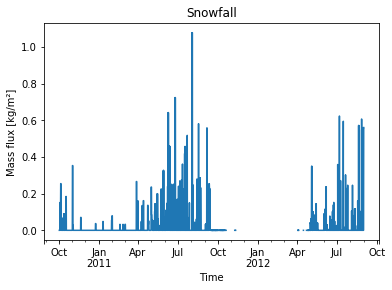

In [23]:
rho_w = 997 # kg/m³ density of water 

df['SNOWFALL'] = np.where(df['TEMP']<=273.15, df['PRCP'], 0) # assume that we have snowfall under zero degree
df['rain'] = np.where(df['TEMP']>=273.15, df['PRCP'], 0)
df['SNOWFALL'] = df['SNOWFALL']*10**-3 * rho_w # mass flux in kg/m²

# Calculate the cumulative sum of precipitation mass flux
df['SNOWFALL_SUM'] = np.cumsum(df['SNOWFALL'])
# Take last value to get the total amount of snowfall 
M_SNOWFALL = df['SNOWFALL_SUM'].iloc[-1]
print('Amount of snowfall per squared meter over the whole period: %f kg/m²' % M_SNOWFALL)


df['SNOWFALL'].plot()
plt.title("Snowfall")
plt.ylabel('Mass flux [kg/m²]')
plt.xlabel('Time');

To differ between snow and rain events at the Zhadang weather station, 
precipitation is only considered to be snow when temperatures are below zero. Though temperatures are colder in the winter, we still have more accumulation during the summer months, because the winters in the Himalayan mountains of the Zhadang glacier are very dry.

### 4.4. Mass balance computation

The total mass balance per squared meter for the whole period: -6193.411282 kg/m²


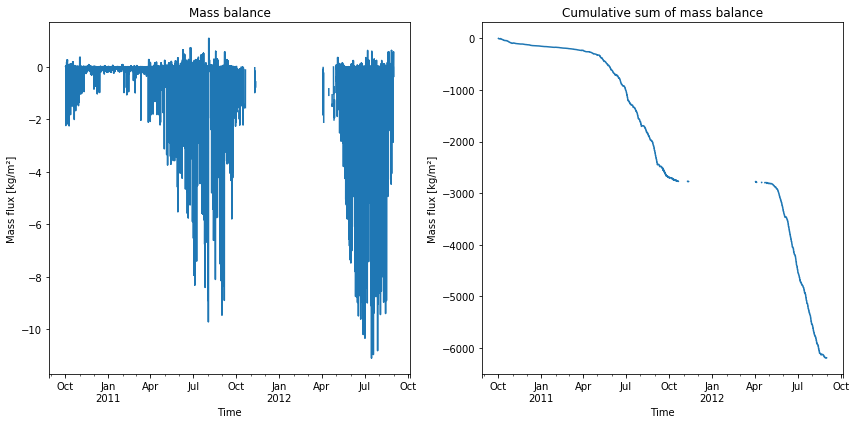

In [24]:
 # sublimation is defined negative, melt positive -> sign convention
df['MB'] = df['SNOWFALL'] - df['MELT'] + df['SUBLIMATION'] + df['DEPOSITION']

df['MB_CUMSUM'] = df['MB'].cumsum()
M_MB = df['MB_CUMSUM'].iloc[-1]
print('The total mass balance per squared meter for the whole period: %f kg/m²' % M_MB)

fig, axs = plt.subplots(1,2, figsize = (12,6))
df['MB'].plot(ax=axs[0])
df['MB_CUMSUM'].plot(ax=axs[1])
axs[0].set(xlabel="Time", ylabel='Mass flux [kg/m²]', title = 'Mass balance')
axs[1].set(xlabel="Time", ylabel='Mass flux [kg/m²]', title = 'Cumulative sum of mass balance')
fig.tight_layout();

## 5. An attempt of validation

### 5.1. / 5.2. Mass balance to surface height:

In order to convert the mass balance series into a surface height change, we must distinguish between ice density and snow density in order to obtain reasonable values. For this purpose, we assume that the surface height measurements (SR50) have been reset before the accumulation period. Therefore, a value of zero should refer to the ice surface assuming no firn layers after the past ablation season and no ablation of ice during the winter. 
Standard values $\mathrm{\rho_{ice}}  = 918 \,\mathrm{kg/m^3}$  and
$\mathrm{\rho_{snow}}  = 450 \,\mathrm{kg/m^3}$ are used in the first place, but will be changed for further analysis later on. 
We use the density for snow, when the height (SR50) is above zero and the density for ice otherwise. This model does not include the case where some ice has melted and snowfall has occurred. In this case, the density of the ice is wrongly assumed.

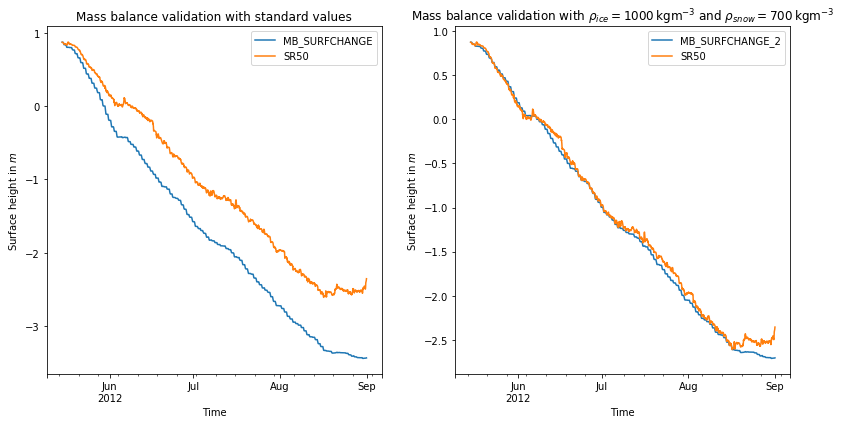

In [25]:
import warnings
warnings.filterwarnings("ignore")

# 2012-05-15 to 2012-08-31
df_valid = df['2012-05-15':'2012-08-31']

# use standard values for ice and snow 
rho_ice  = 918   # density of ice in kg/m^3
rho_snow  = 450  # density of snow in kg/m^3
df_valid['RHO'] = np.where(df_valid['SR50'] > 0, rho_snow, rho_ice) 
df_valid['MB_SURFCHANGE'] = np.cumsum(df_valid['MB'] / df_valid['RHO']) # height change in m
df_valid['MB_SURFCHANGE'] = df_valid['MB_SURFCHANGE'] + df_valid['SR50'].iloc[0] # correct starting value


# use other values for the densities
rho_ice_2 = 1000  # density of ice in kg/m^3
rho_snow_2 = 700  # density of snow in kg/m^3
df_valid['RHO_2'] = np.where(df_valid['SR50'] > 0, rho_snow_2, rho_ice_2) 
df_valid['MB_SURFCHANGE_2'] = np.cumsum(df_valid['MB'] / df_valid['RHO_2']) # height change in m
df_valid['MB_SURFCHANGE_2'] = df_valid['MB_SURFCHANGE_2'] + df_valid['SR50'].iloc[0] # correct starting value

# plots for both density choices
fig, axs = plt.subplots(1,2, figsize = (12,6))
df_valid.plot(y = ['MB_SURFCHANGE', 'SR50'], ax=axs[0])
df_valid.plot(y = ['MB_SURFCHANGE_2', 'SR50'], ax=axs[1])
axs[0].set(xlabel="Time", ylabel=r'Surface height in $m$', title = 'Mass balance validation with standard values')
axs[1].set(xlabel="Time", ylabel=r'Surface height in $m$',
title = r'Mass balance validation with $\rho_{ice} = 1000 \, \mathrm{kg m^{-3}}$ and $\rho_{snow} = 700 \, \mathrm{kg m^{-3}}$')
fig.tight_layout();

### 5.3. Comparison between standard values and less probable values of snow and ice:

When we use standard values for snow and ice densities, the modeled cumulated surface height does not really fit with the SR50 data. Especially in the beginning, he modeled surface height change is much higher than the observed one, which means that we overestimated height change due to the melt of snow, the main contributor to mass loss. This could have different reasons: First, we neglected the ground and rain heat flux in our energy balance which are therefore not covered in our model. But we think that's not the main reason for the overestimation. More reasonable is that we used a to small standard value for the snow density. In our mass flux estimation due to precipitation, we assumed that we have snowfall if the temperature is below zero and rain otherwise. This rain falling on the snow surface will increase the density of snow. The same is true for the melted water, which will alter the density. This motivates to use a greater value for the snow density.

Obviously, the estimation of the surface height looks much better with made-up values for the density of snow and ice.

## References

### Literature:
    
Maussion et al. (2011). Glaciological field studies at Zhadang Glacier (5500 - 6095 m), Tibetan
Plateau. 10.5167/uzh-59625.

Fitzpatrick, Noel & Radić, Valentina & Menounos, Brian. (2019). A multi-season investigation of glacier surface roughness lengths through in situ and remote observation. The Cryosphere. 13. 1051-1071. 10.5194/tc-13-1051-2019.

Miles, E. S., Steiner, J. F., and Brun, F. ( 2017), Highly variable aerodynamic roughness length (z0) for a hummocky debris‐covered glacier, J. Geophys. Res. Atmos., 122, 8447– 8466, doi:10.1002/2017JD026510. 

Munro, D. (1989). Surface Roughness and Bulk Heat Transfer on a Glacier: Comparison with Eddy Correlation. Journal of Glaciology, 35(121), 343-348. doi:10.3189/S0022143000009266

### Sensors:
CS300: https://aquasense.dk/wp-content/uploads/2017/03/cs300.pdf
IRTS-P: https://s.campbellsci.com/documents/au/product-brochures/b_irts-p.pdf
NR-Lite: https://s.campbellsci.com/documents/us/manuals/nr-lite.pdf

### Images:
https://www.klima.tu-berlin.de/forschung/Asien/tibet/pics/one_season.gif

